In [1]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
target = 'medv'
y = df[target]

In [7]:
df = pd.get_dummies(df,columns=['rad'])

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [9]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

# Analisis Bivariado

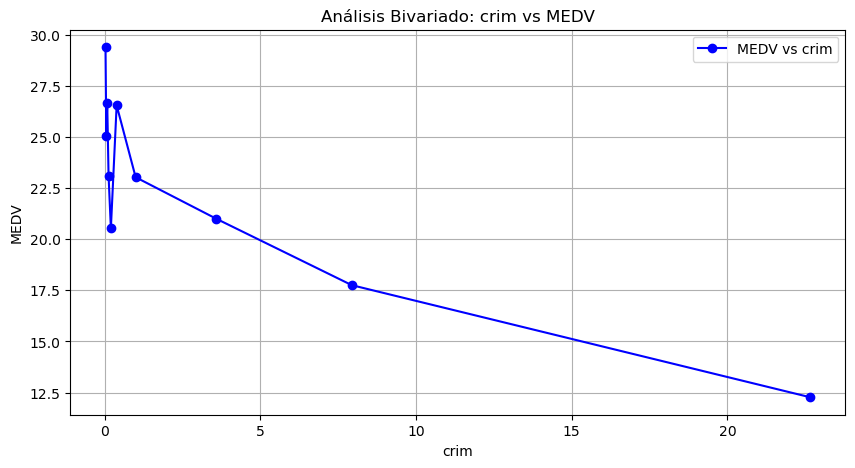

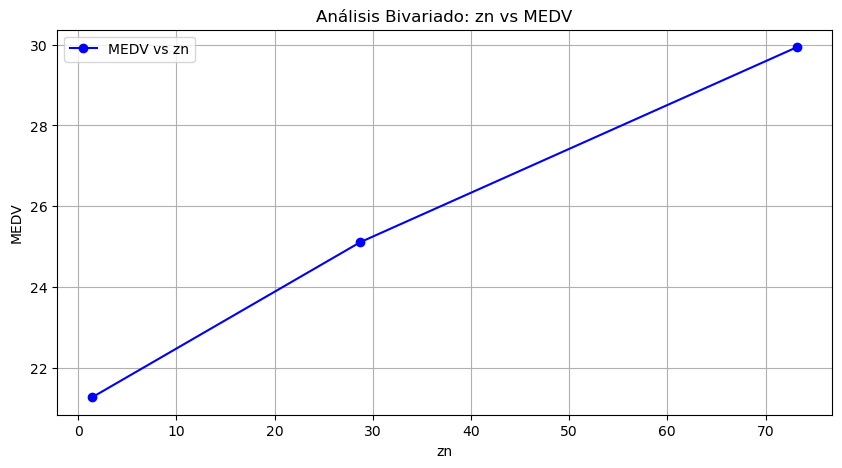

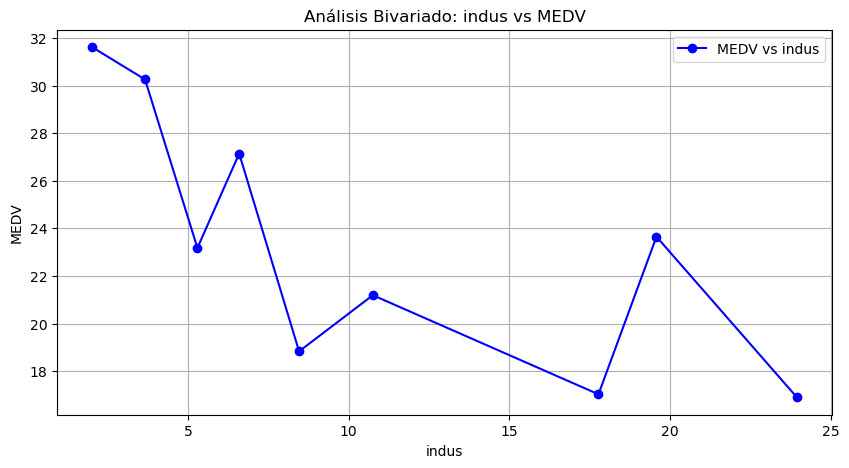

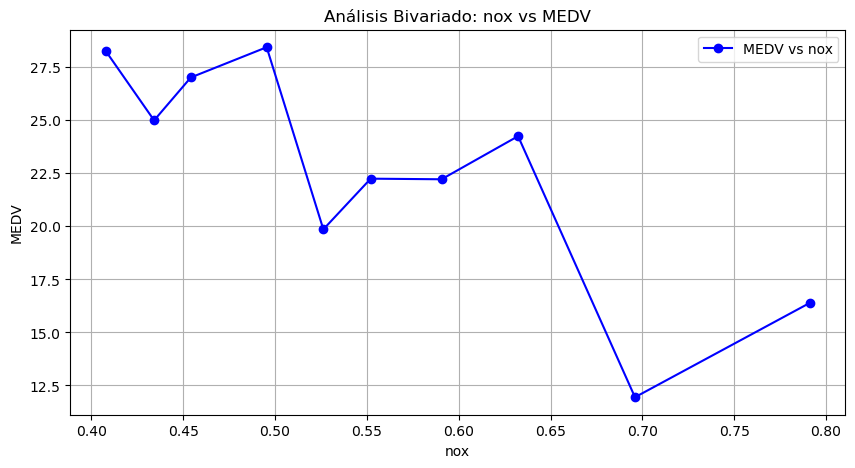

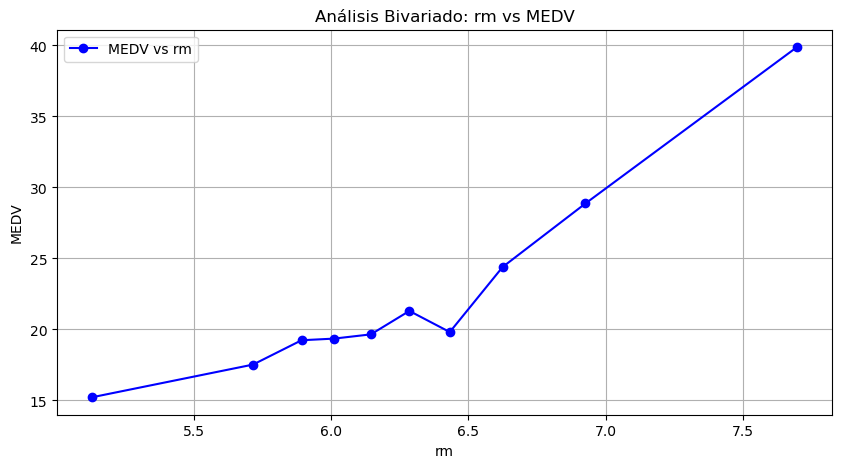

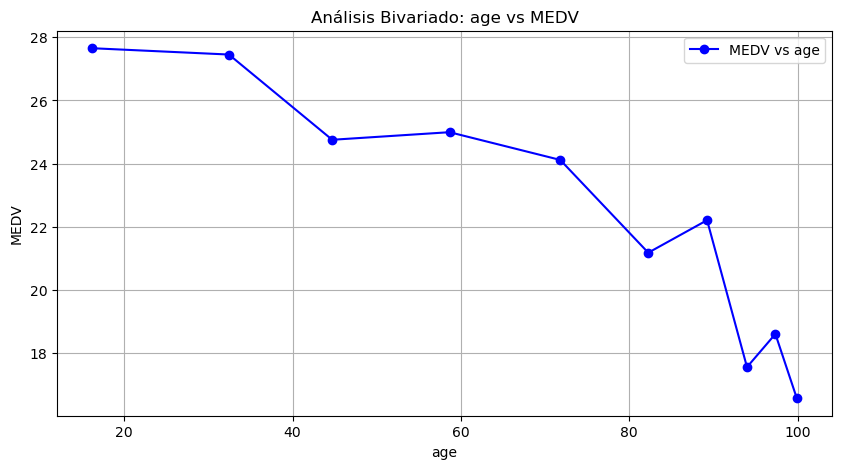

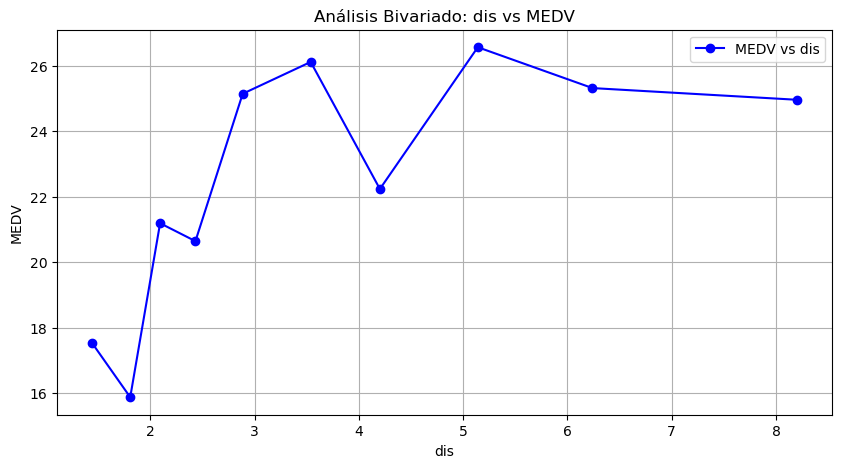

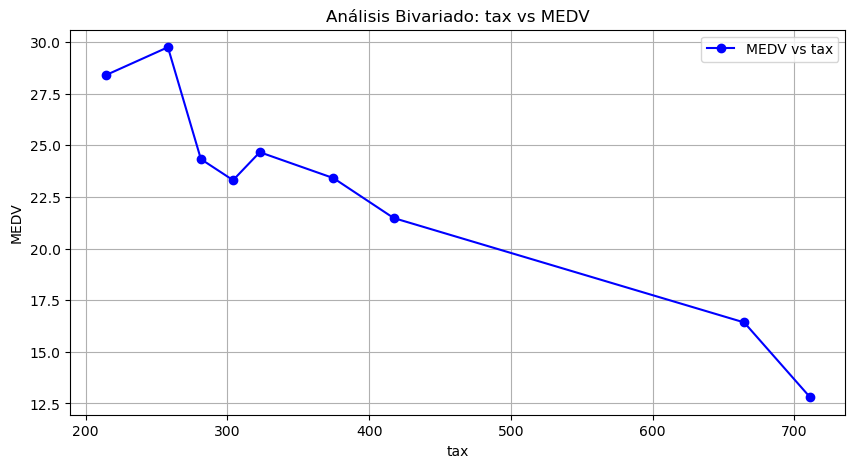

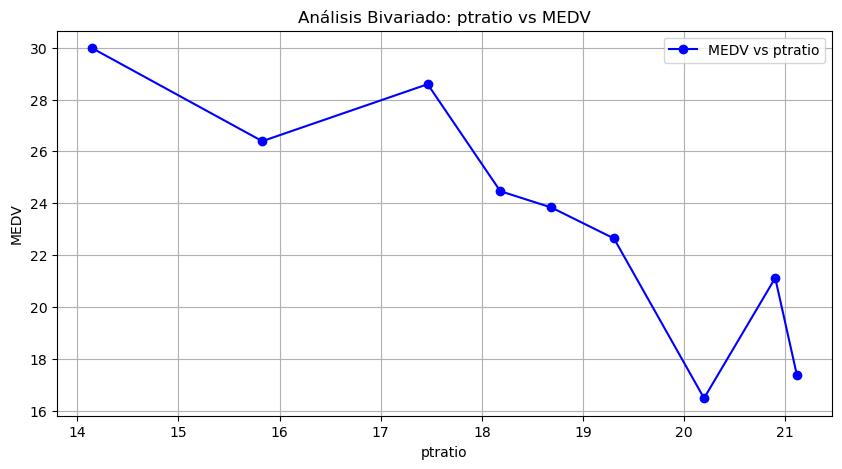

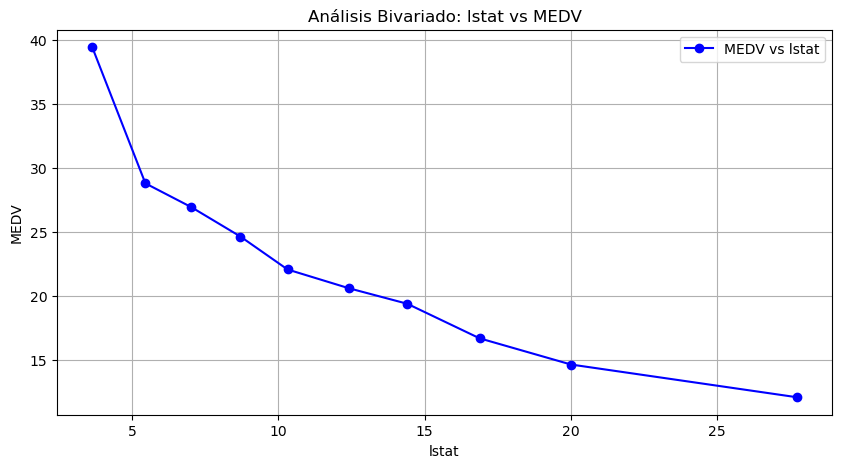

In [10]:
variables = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']

for i in variables:
    variable_bin = f'{i}_bin'
    df[variable_bin] = pd.qcut(df[i], q=10, labels=False, duplicates='drop') + 1
    grouped = df.groupby(variable_bin).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(grouped[i].values, grouped[target].values, marker="o", label=f'MEDV vs {i}', color='b')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.title(f'Análisis Bivariado: {i} vs MEDV')
    plt.legend()
    plt.grid()
    plt.show()
    df.drop(columns=[variable_bin], inplace=True)




# Scatter

In [11]:

df.head()


,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [12]:
X = df.copy()
X = X.drop(target, axis=1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,4.98,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,9.14,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,4.03,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,2.94,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,5.33,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,9.67,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,9.08,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,5.64,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,6.48,1,0,0,0,0,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.721143283062659

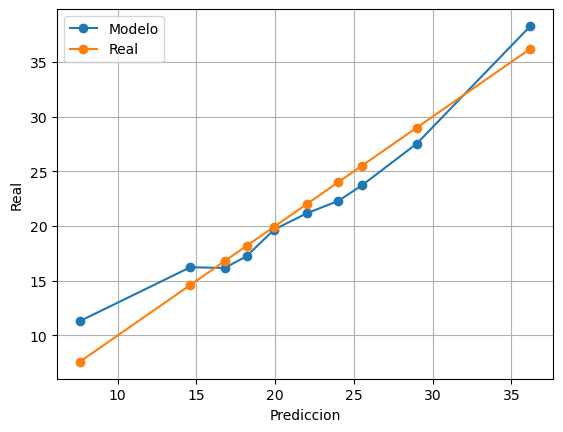

In [14]:
calibracion(predicciones_lineal, y_test, 10)

In [15]:
degree = 2

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8121940246948016

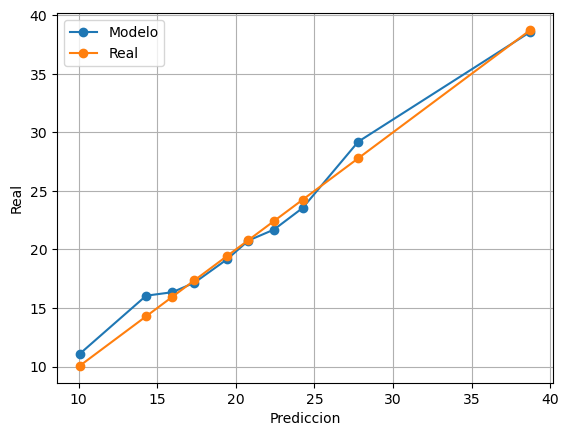

In [16]:
calibracion(predicciones_poly2, y_test, 10)

In [17]:
degree = 3

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.728675493313274

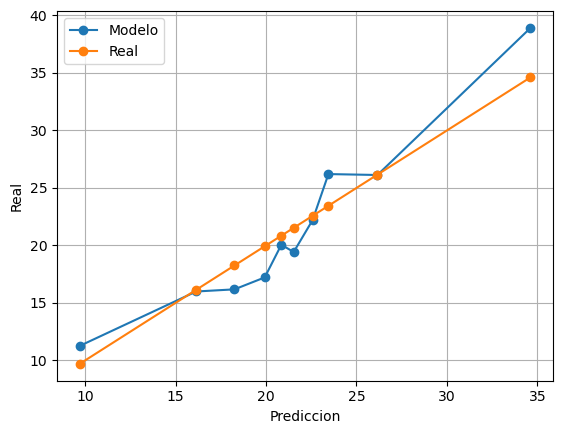

In [18]:
calibracion(predicciones_poly3, y_test, 10)

In [27]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [39]:
result = smf.ols('medv ~ ' + '+'.join(df.columns.drop(['medv', 'indus', 'age', 'rad_1', 'rad_6','rad_2'])), data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7323,5.082,8.212,0.000,31.747,51.718
crim,-0.1233,0.033,-3.769,0.000,-0.188,-0.059
zn,0.0533,0.014,3.816,0.000,0.026,0.081
chas,2.6619,0.863,3.085,0.002,0.967,4.357
nox,-18.3170,3.617,-5.064,0.000,-25.424,-11.210
rm,3.5311,0.412,8.565,0.000,2.721,4.341
dis,-1.6216,0.189,-8.561,0.000,-1.994,-1.249
tax,-0.0087,0.003,-2.534,0.012,-0.015,-0.002
ptratio,-0.9678,0.144,-6.709,0.000,-1.251,-0.684
lstat,-0.5488,0.047,-11.618,0.000,-0.642,-0.456


In [21]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,0,0,1,0,0,0,0,0,0


In [45]:
X_multiple = df[['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat', 'rad_3', 'rad_4', 'rad_5', 'rad_7', 'rad_8', 'rad_24']]
model_multiple = linear_model.Ridge().fit(X_multiple, y)
model_multiple.fit(X_multiple, y)
predicciones_multiple = model_multiple.predict(X_multiple)
print(r2_score(y_true = y, y_pred = predicciones_multiple))
print(model_multiple.intercept_,model_multiple.coef_)

0.7406164937085635
36.73074747150277 [-1.15573858e-01  5.43807562e-02  2.51260801e+00 -1.14299505e+01
  3.58114139e+00 -1.44257177e+00 -9.31186877e-03 -9.03264375e-01
 -5.71165228e-01  3.39776226e+00  1.28363496e+00  1.28749424e+00
  3.36941787e+00  3.35577229e+00  5.12128804e+00]


In [46]:
scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_multiple,y, test_size=0.3, random_state = 42)

model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.7243799203758673

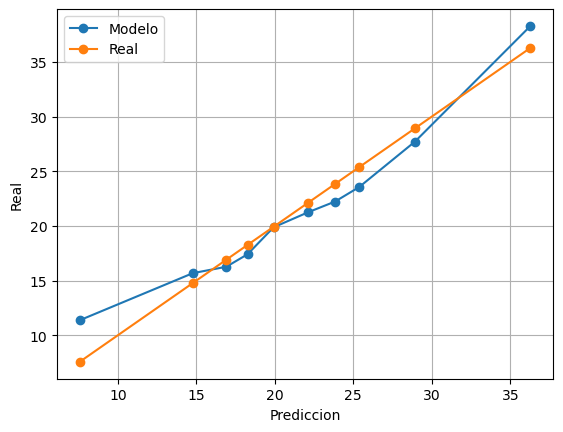

In [66]:
calibracion(predicciones_lineal, y_test, 10)

In [55]:
degree = 2

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Ridge().fit(X_train, y_train)

 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

0.8107558114121767

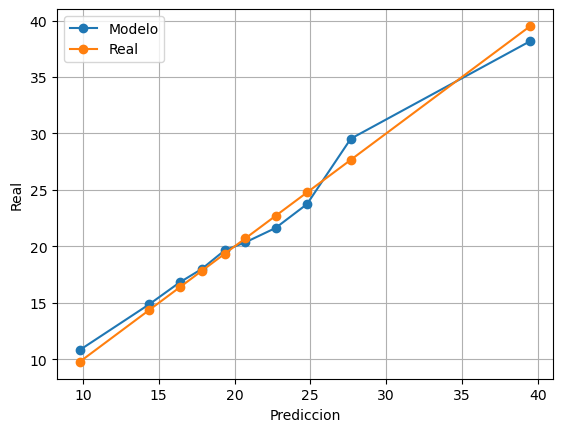

In [67]:
calibracion(predicciones_poly2, y_test, 10)

In [53]:
degree = 3

scaler = StandardScaler().fit(X_multiple)
X_scaled = scaler.transform(X_multiple)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.3, random_state = 42)
 
model = linear_model.Lasso().fit(X_train, y_train)

 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

0.7688308046927307

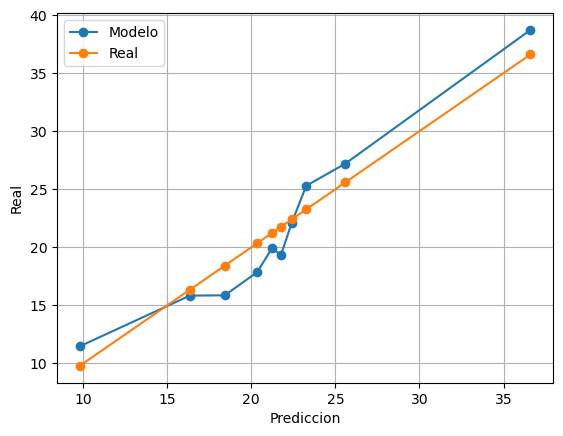

In [68]:
calibracion(predicciones_poly3, y_test, 10)

In [80]:
X_multiple.columns

Index(['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat',
       'rad_3', 'rad_4', 'rad_5', 'rad_7', 'rad_8', 'rad_24', 'crim_bin',
       'zn_bin'],
      dtype='object')

In [81]:
numerical_features = ['crim', 'zn', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat'] 

In [82]:

X_train, X_test, y_train, y_test = train_test_split(X_multiple,y, test_size=0.3, random_state = 42)

def create_bins(X_multiple, numeric_vars, bins):
    for var in numeric_vars:
        X_multiple[f'{var}_bin']=pd.qcut(X_multiple[var], q=bins, labels=False, duplicates='drop')
    return X_multiple

X_train = create_bins(X_train, numerical_features, 25)
X_test = create_bins(X_test, numerical_features, 25)
bin_features = [i for i in X_train.keys() if 'bin' in i]
cat_features = [i for i in X_train.keys() if 'bin' not in i]

final_features = bin_features + cat_features

X_train = pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)
X_test = pd.get_dummies(X_test[final_features], columns=bin_features, drop_first=True)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

predicciones_final = model.predict(X_test)
r2_score(y_pred=predicciones_final, y_true=y_test)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ptratio_bin_2
Feature names seen at fit time, yet now missing:
- nox_bin_21
- nox_bin_24
- ptratio_bin_12
- ptratio_bin_15
- ptratio_bin_18
- ...


In [83]:
print(X_train.shape, X_test.shape)
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))


(354, 176) (152, 170)
{'nox_bin_24', 'zn_bin_6', 'tax_bin_18', 'nox_bin_21', 'ptratio_bin_12', 'ptratio_bin_15', 'ptratio_bin_18'}
{'ptratio_bin_2'}
